# Resuelve
## Ejercicio 2


Con el data set en el archivo "datos_prestamo.csv" tiene información de una empresa que otorga créditos. Hasta ahora, hay un grupo de personas (el equipo de crédito) que estudia registro a registro y decide si prestarle o no. Las variables que tenemos son:

- Fecha_registro: El día y hora que el usuario se registró en nuestro sitio web.
- Fecha_contacto: El día y hora que un asesor se comunicó con el cliente. Debe ser posterior a la Fecha de registro.
- Id: Identificador que se le asigna al cliente. Debe ser único.
- Genero: Hombre o mujer.
- Casado: Si está casado.
- Dependientes: Número de personas que dependen de su ingreso.
- Educacion: Graduado si tiene un título universitario o superior. No graduado en otro caso.
- Trabaja_para_el: Si es dueño del negocio o empresa en donde trabaja.
- Salario: Salario neto anual en pesos.
- Salario_pareja: Salario neto anual de la pareja en pesos.
- Credito_pedido: Crédito que solicito en miles de pesos.
- Plazo_prestamo: Plazo al que pidió su crédito en días (en cuántos días va a pagar).
- Hitorial_crediticio: 1 si tiene historial crediticio, 0 si no tiene.
- Area_vivienda: En qué tipo de área esta situada su casa.
- Estatus_prestamo: Si le otorgaron el crédito.
- Asesor_asignado: El nombre del asesor que atenderá al cliente si se le otorgó el crédito.

En el último mes, han llegado muchos más registros de los que puede atender el equipo de crédito. Alguien sugirió crear un modelo para poder decidir a quien prestarle.

- ¿Crees que sea una buena idea? ¿ Por qué?
    - _Si por que se estaria automatizando el proceso con un buen nivel de aceptacion, y la decicion de otorgamiento de un credito se daria casi de froma inmediata._
- Si la respuesta fue sí, ¿qué tipo de probema es según los datos que tienes? (Supervisado o No Supervisado)
    - _Es un tipo de problema supervisado, ya que tenemos un conjunto de datos etiquetado en donde conocemos el valor de la vriable objetivo (Target)._
- Haz las transformaciones que necesites a los datos y desarrolla algún modelo.
- ¿Cómo sabes que es un buen modelo?
    - _Evaluando el modelo con una matriz de confusion on donde observamos que tan bien responde el modelo implementado a las predicciones echas._
    - _Evaluando el modelo con un porcentaje de exactitud en las predicciones(accuracy)_
    - _Evaluando el modelo midiendo la sensibilidad (Recall) evaluando cuantos resultado positivos y negativos fue capaz de acertar._

In [1350]:
#Importamos las librerias necesarias 
import pandas as pd
import matplotlib.pyplot as plt

#### Exploracion de datos

In [1351]:
#Importamos el set datos desde GiHub y los alamacenamos en el DataFrame con nombre df
url = 'https://raw.githubusercontent.com/resuelve/resuelve-ia-prueba/master/datos_prestamo.csv'
df = pd.read_csv(url,index_col=0,parse_dates=[0])
df

,Fecha_registro,Fecha_contacto,Id,Genero,Casado,Dependientes,Educacion,Trabaja_para_el,Salario,Salario_Pareja,Credito_pedido,Plazo_prestamo,Historial_crediticio,Area_vivienda,Estatus_prestamo,Asesor_asignado
0,02/26/2019 11:00 AM,02/27/2019 12:03 PM,LP002519,Hombre,Si,3+,Graduado,No,4691,0.0,100.0,360.0,1.0,Semiurbana,Si,Dudley
1,02/27/2019 02:52 PM,02/26/2019 07:43 AM,LP001280,Hombre,Si,2,No Graduado,No,3333,2000.0,99.0,360.0,NaN,Semiurbana,Si,Pablo
2,02/27/2019 08:18 AM,02/28/2019 02:27 PM,LP001151,Mujer,No,0,Graduado,No,4000,2275.0,144.0,360.0,1.0,Semiurbana,Si,Dudley
3,02/28/2019 10:00 AM,03/01/2019 12:57 PM,LP002036,Hombre,Si,0,Graduado,No,2058,2134.0,88.0,360.0,NaN,Urabana,Si,Ana
4,02/26/2019 07:40 AM,02/27/2019 04:35 PM,LP002894,Mujer,Si,0,Graduado,No,3166,0.0,36.0,360.0,1.0,Semiurbana,Si,Regina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,02/27/2019 08:22 AM,02/28/2019 01:04 PM,LP002894,Mujer,Si,0,Graduado,No,3166,0.0,36.0,360.0,1.0,Semiurbana,Si,Pablo
553,02/27/2019 10:40 AM,02/28/2019 01:10 PM,LP002315,Hombre,Si,1,Graduado,No,8300,0.0,152.0,300.0,0.0,Semiurbana,No,NaN
554,02/28/2019 10:32 AM,03/01/2019 02:20 PM,LP002225,Hombre,Si,2,Graduado,No,5391,0.0,130.0,360.0,1.0,Urabana,Si,Ana
555,02/26/2019 09:48 AM,02/27/2019 01:28 PM,LP002807,Hombre,Si,2,No Graduado,No,3675,242.0,108.0,360.0,1.0,Semiurbana,Si,Pablo


In [1352]:
#Limpiamos el Dataframe de valores NaN
df = df.fillna(0)
df

,Fecha_registro,Fecha_contacto,Id,Genero,Casado,Dependientes,Educacion,Trabaja_para_el,Salario,Salario_Pareja,Credito_pedido,Plazo_prestamo,Historial_crediticio,Area_vivienda,Estatus_prestamo,Asesor_asignado
0,02/26/2019 11:00 AM,02/27/2019 12:03 PM,LP002519,Hombre,Si,3+,Graduado,No,4691,0.0,100.0,360.0,1.0,Semiurbana,Si,Dudley
1,02/27/2019 02:52 PM,02/26/2019 07:43 AM,LP001280,Hombre,Si,2,No Graduado,No,3333,2000.0,99.0,360.0,0.0,Semiurbana,Si,Pablo
2,02/27/2019 08:18 AM,02/28/2019 02:27 PM,LP001151,Mujer,No,0,Graduado,No,4000,2275.0,144.0,360.0,1.0,Semiurbana,Si,Dudley
3,02/28/2019 10:00 AM,03/01/2019 12:57 PM,LP002036,Hombre,Si,0,Graduado,No,2058,2134.0,88.0,360.0,0.0,Urabana,Si,Ana
4,02/26/2019 07:40 AM,02/27/2019 04:35 PM,LP002894,Mujer,Si,0,Graduado,No,3166,0.0,36.0,360.0,1.0,Semiurbana,Si,Regina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,02/27/2019 08:22 AM,02/28/2019 01:04 PM,LP002894,Mujer,Si,0,Graduado,No,3166,0.0,36.0,360.0,1.0,Semiurbana,Si,Pablo
553,02/27/2019 10:40 AM,02/28/2019 01:10 PM,LP002315,Hombre,Si,1,Graduado,No,8300,0.0,152.0,300.0,0.0,Semiurbana,No,0
554,02/28/2019 10:32 AM,03/01/2019 02:20 PM,LP002225,Hombre,Si,2,Graduado,No,5391,0.0,130.0,360.0,1.0,Urabana,Si,Ana
555,02/26/2019 09:48 AM,02/27/2019 01:28 PM,LP002807,Hombre,Si,2,No Graduado,No,3675,242.0,108.0,360.0,1.0,Semiurbana,Si,Pablo


In [1353]:
#Describimos los datos
df.describe()

,Salario,Salario_Pareja,Credito_pedido,Plazo_prestamo,Historial_crediticio
count,557.000000,557.000000,557.000000,557.000000,557.00000
mean,5478.807899,1685.644596,141.344704,334.233393,0.81149
std,6331.507982,2946.151879,89.291675,80.085450,0.39147
min,150.000000,0.000000,0.000000,0.000000,0.00000
25%,2882.000000,0.000000,97.000000,360.000000,1.00000
50%,3812.000000,1302.000000,125.000000,360.000000,1.00000
75%,5829.000000,2375.000000,166.000000,360.000000,1.00000
max,81000.000000,41667.000000,700.000000,480.000000,1.00000


In [1354]:
# Verificamos los datos target (Variables independientes)
df.Estatus_prestamo.value_counts()

Si    440
No    117
Name: Estatus_prestamo, dtype: int64

Observamos que los datos estan desbalanceados teniendo una mayor cantidad de prestamos otorgados, por lo que aplicaremos Smote-Tomek para balancear los datos.

In [1355]:
#Creamos el DataFrame con las caracteristicas(features) (Variables independientes)
df_f = df[['Salario','Salario_Pareja','Credito_pedido','Historial_crediticio']]
df_f

,Salario,Salario_Pareja,Credito_pedido,Historial_crediticio
0,4691,0.0,100.0,1.0
1,3333,2000.0,99.0,0.0
2,4000,2275.0,144.0,1.0
3,2058,2134.0,88.0,0.0
4,3166,0.0,36.0,1.0
...,...,...,...,...
552,3166,0.0,36.0,1.0
553,8300,0.0,152.0,0.0
554,5391,0.0,130.0,1.0
555,3675,242.0,108.0,1.0


In [1356]:
#Creamos el DataFrame con los datos objetivo (target)(Variable dependiente)
df_t = df[['Estatus_prestamo']]
df_t

,Estatus_prestamo
0,Si
1,Si
2,Si
3,Si
4,Si
...,...
552,Si
553,No
554,Si
555,Si


#### Balanceo de datos Smote-Tomek

Utilizamos el balance de datos Smote-Tomek en donde aplacaremos simultaneamente un subsampling y oversampling

In [1357]:
from imblearn.combine import SMOTETomek
smoteT = SMOTETomek()

#Creamos los nuevos set de datos en donde ya tenemos los datos balanceados
df_f_s, df_t_s= smoteT.fit_resample(df_f,df_t)
#Observamos el nuevo set de datos de features
df_f_s

,Salario,Salario_Pareja,Credito_pedido,Historial_crediticio
0,4691,0.000000,100.000000,1.000000
1,3333,2000.000000,99.000000,0.000000
2,4000,2275.000000,144.000000,1.000000
3,2058,2134.000000,88.000000,0.000000
4,3166,0.000000,36.000000,1.000000
...,...,...,...,...
741,4077,2488.351973,159.520780,0.108627
742,2893,1885.588677,130.018318,0.000000
743,4579,0.000000,87.109579,1.000000
744,3403,0.000000,101.951767,1.000000


In [1358]:
#Observamos el nuevo set de datos de target
df_t_s

,Estatus_prestamo
0,Si
1,Si
2,Si
3,Si
4,Si
...,...
741,No
742,No
743,No
744,No


#### Entrenamiento del modelo

In [1359]:
#Dividimos datos para entrenamiento y prueba 
#datos de caracteristicas de entrenamiento y prueba (fTrain, fTest) datos objetivo de entrnamiento y prueba (tTrain,tTest)
from sklearn.model_selection import train_test_split

fTrain, fTest, tTrain, tTest = train_test_split(df_f_s, df_t_s, test_size=0.3 )

In [1360]:
#Definimos la configuracion del clasificador con un maximo de iteraciones de 1000
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(max_iter=500)

In [1361]:
#Entrenamiento del modelo
modelLR.fit(fTrain,tTrain)

c:\users\pavilion g4\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(max_iter=500)

#### Prediccion y evaluacion

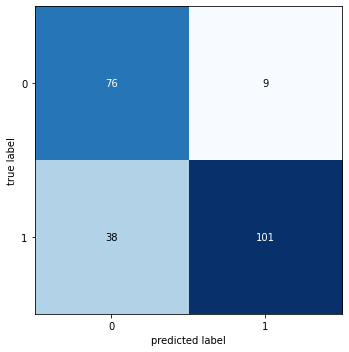

In [1362]:
#Evalucion del modelo 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#Hacemos la prediccion de los datos con las caracteristicas de prueba
pred = modelLR.predict(fTest)
#Realizamos la matriz de confusion para la evalucion del modelo en cuanto errores de las predicciones
matriz = confusion_matrix(pred,tTest)
plot_confusion_matrix(conf_mat=matriz, figsize=(5,5), show_normed=False)
plt.tight_layout()

In [1363]:
#Evaluacion de Exactitud del modelo, en donde evaluamos el porcentaje de predicciones correctas
from sklearn.metrics import accuracy_score

accuracy_score(tTest,pred)

0.7901785714285714

In [1364]:
#Evaluacion del porcentaje de la clase positiva que el modelo ha identificado correctamente
from sklearn.metrics import precision_score

precision_score(tTest,pred,pos_label='Si')

0.7266187050359713

In [1365]:
#Evaluacion el porcentaje de la clase negativa que el modelo ha identificado correctamente
precision_score(tTest,pred,pos_label='No')

0.8941176470588236